## Universidade Estadual de Campinas
### Instituto de Computação
### Introdução ao Processamento Digital de Imagem (MO443)
#### Professor: Hélio Pedrini
#### 1S2023

### Trabalho 1
#### Aluno: Maurício Pereira Lopes - m225242

In [2]:
# Especificação do problema
# O objetivo deste trabalho é realizar alguns processamentos basicos em imagens digitais. Quando
# pertinente, a vetorização de comandos deve ser empregada nas operações. 

In [3]:
# !pip install imageio

In [4]:
import imageio as iio
import matplotlib.pyplot as plt
import numpy as np
import random

In [5]:
# 1.1 Mosaico
# Construir um mosaico de 4x4 blocos a partir de uma imagem monocromática.

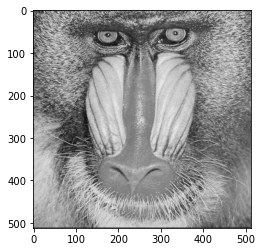

In [6]:
# Lendo as imagens

im = iio.imread('https://www.ic.unicamp.br/~helio/imagens_png/baboon.png')

plt.imshow(im, cmap='gray')
plt.show()

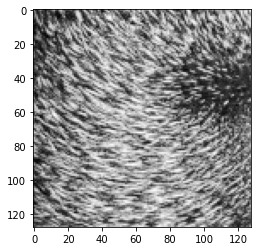

In [7]:
M = im.shape[0] // 4
N = im.shape[1] // 4

sub_imagens = [im[x:x+M,y:y+N] for x in range(0,im.shape[0],M) for y in range(0,im.shape[1],N)]

plt.imshow(sub_imagens[0], cmap='gray')
plt.show()

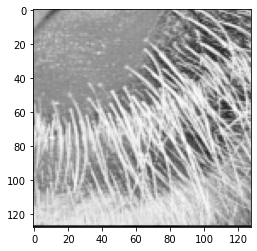

In [8]:
random.shuffle(sub_imagens)

plt.imshow(sub_imagens[0], cmap='gray')
plt.show()

(16, 128, 128)


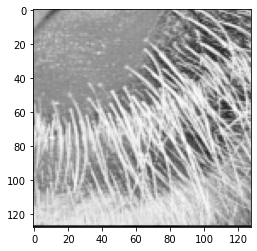

In [9]:
sub_im_array = np.array(sub_imagens)
print(sub_im_array.shape)
plt.imshow(sub_im_array[0], cmap='gray')
plt.show()

In [10]:
final_im = np.empty((512, 512))

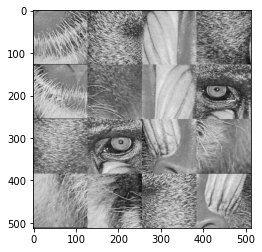

In [11]:
final_im[0:128, 0:128] = sub_im_array[0]
final_im[128:256, 0:128] = sub_im_array[1]
final_im[256:384, 0:128] = sub_im_array[2]
final_im[384:512, 0:128] = sub_im_array[3]
final_im[0:128, 128:256] = sub_im_array[4]
final_im[128:256, 128:256] = sub_im_array[5]
final_im[256:384, 128:256] = sub_im_array[6]
final_im[384:512, 128:256] = sub_im_array[7]
final_im[0:128, 256:384] = sub_im_array[8]
final_im[128:256, 256:384] = sub_im_array[9]
final_im[256:384, 256:384] = sub_im_array[10]
final_im[384:512, 256:384] = sub_im_array[11]
final_im[0:128, 384:512] = sub_im_array[12]
final_im[128:256, 384:512] = sub_im_array[13]
final_im[256:384, 384:512] = sub_im_array[14]
final_im[384:512, 384:512] = sub_im_array[15]
plt.imshow(final_im, cmap='gray')
plt.show()

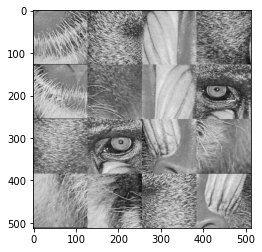

In [12]:
sub_im_index = 0
for bloco_coluna in range(0, 512, 128):
    for bloco_linha in range(0, 512, 128):
            final_im[bloco_linha:bloco_linha+128, bloco_coluna:bloco_coluna+128] = sub_im_array[sub_im_index]
            sub_im_index = sub_im_index + 1

plt.imshow(final_im, cmap='gray')
plt.show()

In [13]:
# 1.2 Combinação de Imagens
# Combinar duas imagens monocromaticas de mesmo tamanho por meio da média ponderada de
# seus níveis de cinza.

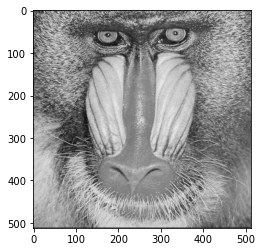

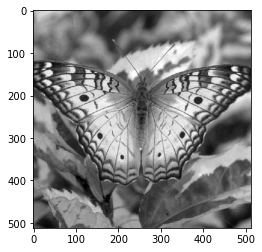

In [14]:
# Lendo as imagens

im_A = iio.imread('https://www.ic.unicamp.br/~helio/imagens_png/baboon.png')
im_B = iio.imread('https://www.ic.unicamp.br/~helio/imagens_png/butterfly.png')

plt.imshow(im_A, cmap='gray')
plt.show()
plt.imshow(im_B, cmap='gray')
plt.show()

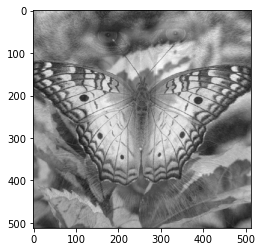

In [15]:
im_comb_1 = im_A * 0.2 + im_B * 0.8
plt.imshow(im_comb_1, cmap='gray')
plt.show()

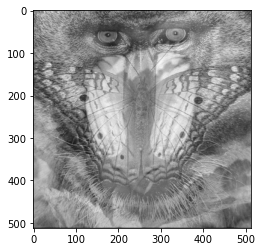

In [16]:
im_comb_2 = im_A * 0.5 + im_B * 0.5
plt.imshow(im_comb_2, cmap='gray')
plt.show()

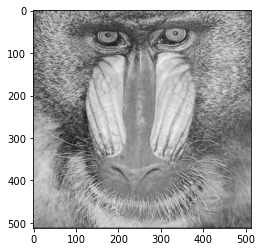

In [17]:
im_comb_3 = im_A * 0.8 + im_B * 0.2
plt.imshow(im_comb_3, cmap='gray')
plt.show()

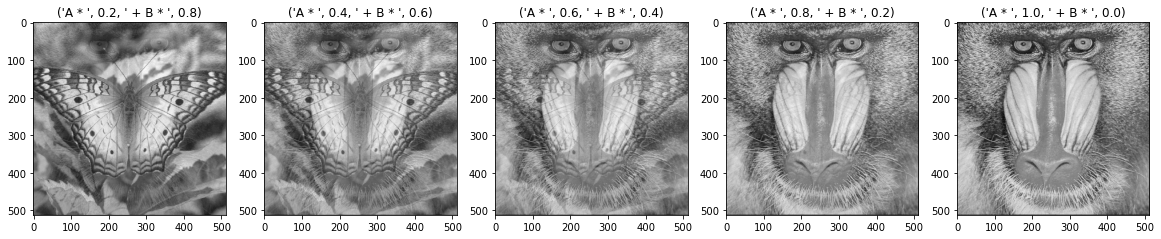

In [18]:
fig, axs = plt.subplots(1, 5, figsize=(20, 20))
count = 0
for c in range(5):
    peso_A = round(count + 0.2, 1)
    peso_B = round(1 - (count + 0.2), 1)
    im_comb = im_A * peso_A + im_B * peso_B
    axs[c].imshow(im_comb, cmap='gray')
    label = 'A * ', peso_A, ' + B * ', peso_B
    axs[c].set_title(label)
    count = count + 0.2

In [19]:
im_comb_1.max()

212.40000000000003

In [20]:
# 1.3 Transformação de Intensidade

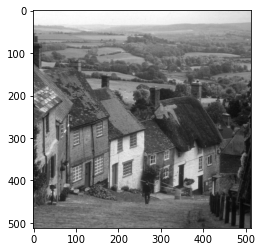

In [21]:
# Lendo a imagem

im = iio.imread('https://www.ic.unicamp.br/~helio/imagens_png/city.png')

plt.imshow(im, cmap='gray')
plt.show()

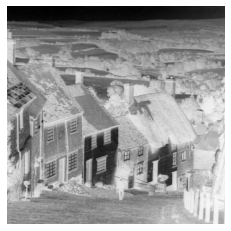

In [22]:
# (b) negativo da imagem

im_negativa = 255 - im
plt.imshow(im_negativa, cmap='gray')
plt.axis("off")
plt.show()

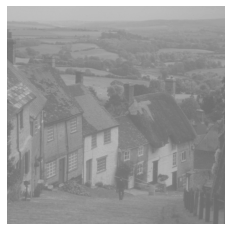

In [32]:
# (c) imagem transformada

lim_sup = 200
lim_inf = 100
im_contraste = ((im * ((lim_sup - lim_inf) / 255)) + lim_inf).astype(np.uint8)
plt.imshow(im_contraste, cmap='gray', vmin=0, vmax=255)
plt.axis("off")
plt.show()

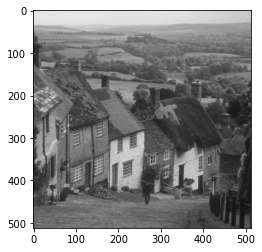

In [28]:
lim_sup = 255
lim_inf = 0
test_im = ((im_contraste * ((lim_sup - lim_inf) / 100) + lim_inf)).astype(np.uint8)
plt.imshow(test_im, cmap='gray', vmin=0, vmax=255)
plt.show()


In [31]:
im.min()

16

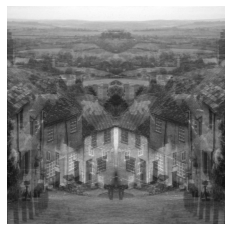

In [33]:
# (d) linhas pares invrertidas

new_im = im.copy()

for r in range(0, 512, 2):
    new_im[r, :] = im[r, ::-1]
    
plt.imshow(new_im, cmap='gray')
plt.axis("off")
plt.show()

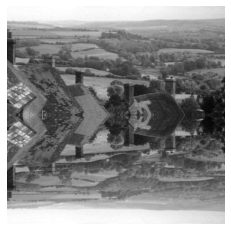

In [35]:
# (e) reflexão de linhas

new_im = im.copy()

#new_im[0:256, :]

new_im[256:, :] = new_im[0:256, :][::-1, ...]

plt.imshow(new_im, cmap='gray')
plt.axis("off")
plt.show()

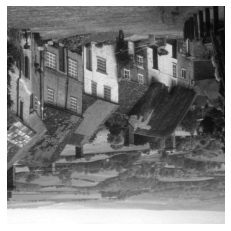

In [36]:
# (f) espelhamento vertical

new_im = im.copy()

new_im = new_im[::-1, ...]

plt.imshow(new_im, cmap='gray')
plt.axis("off")
plt.show()

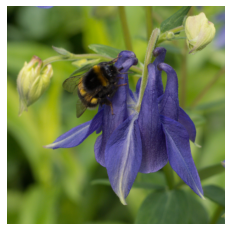

In [37]:
# 1.4 Imagens Coloridas

# Lendo imagem colorida


im = iio.imread('https://webpages.tuni.fi/imaging/tampere17/t095.png')

plt.imshow(im)
plt.axis("off")
plt.show()

(512, 512, 3)


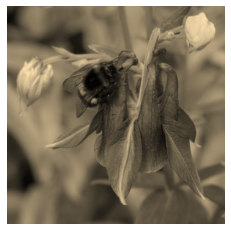

In [38]:
# Item (a)

nova_im = np.ones((512, 512, 3))
nova_im[:, :, 0] = im[:, :, 0] * 0.393 + im[:, :, 1] * 0.769 + im[:, :, 2] * 0.189
nova_im[:, :, 1] = im[:, :, 0] * 0.349 + im[:, :, 1] * 0.686 + im[:, :, 2] * 0.168
nova_im[:, :, 2] = im[:, :, 0] * 0.272 + im[:, :, 1] * 0.534 + im[:, :, 2] * 0.131

nova_im = (((nova_im - nova_im.min()) * 255) / (nova_im.max() - nova_im.min())).astype(int)

print(nova_im.shape)

plt.imshow(nova_im)
plt.axis("off")
plt.show()

(512, 512)


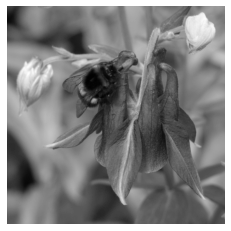

In [40]:
# Item (b)

im_comb = np.array((512, 512))
im_comb = (im[:, : , 0] * 0.2989 + im[:, : , 1] * 0.5870 + im[:, : , 2] * 0.1140).astype(int)

print(im_comb.shape)

plt.imshow(im_comb, cmap = "gray")
plt.axis("off")
plt.show()

(512, 512)


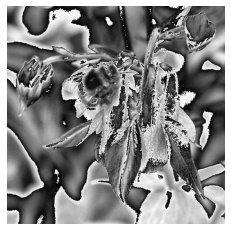

In [41]:
im_comb = im[:, : , 0] + im[:, : , 1] + im[:, : , 2]

print(im_comb.shape)

plt.imshow(im_comb, cmap = "gray")
plt.axis("off")
plt.show()

In [163]:
im.max()

245

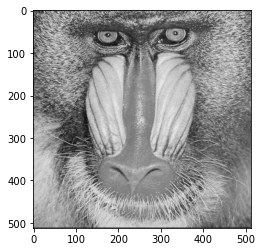

In [43]:
# 1.5 Ajuste de Brilho

# Lendo as imagens

im = iio.imread('https://www.ic.unicamp.br/~helio/imagens_png/baboon.png')

plt.imshow(im, cmap='gray')
plt.show()

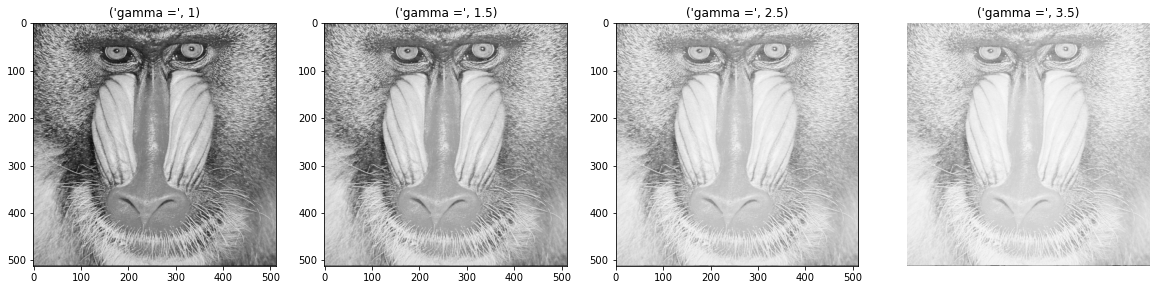

In [45]:
gamma = [1, 1.5, 2.5, 3.5]

im_0_to_1 = ((im * ((1 - 0) / 255)) + 0)
im_B = []

for i in range(4):
    im_B.append(im_0_to_1 ** (1/gamma[i]))
    im_B[i] = (im_B[i] * 255).astype(int)


fig, axs = plt.subplots(1, 4, figsize=(20, 20))
for i in range(4):
    axs[i].imshow(im_B[i], cmap='gray')
    axs[i].set_title(label = ("gamma =", gamma[i]))
    plt.axis("off")
plt.show()    

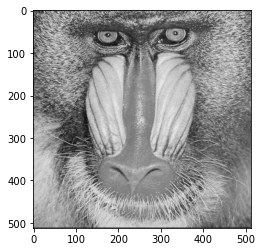

In [33]:
# 1.6 Quantização de Imagens 

# Lendo as imagens

im = iio.imread('https://www.ic.unicamp.br/~helio/imagens_png/baboon.png')

plt.imshow(im, cmap='gray')
plt.show()

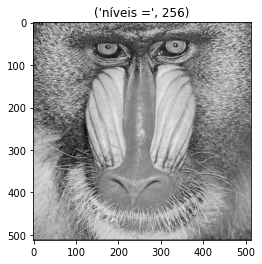

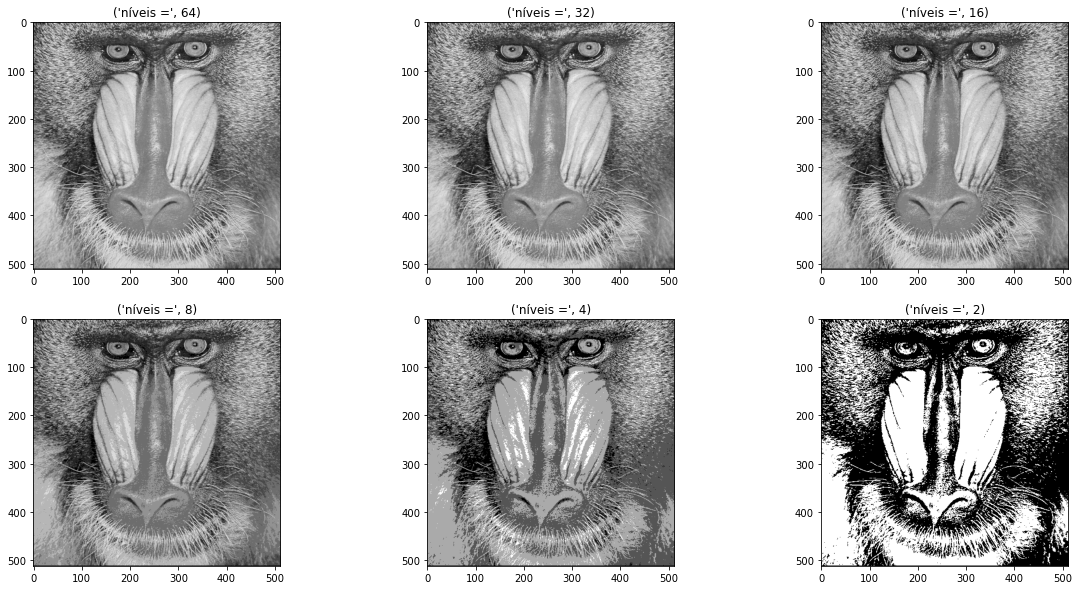

In [34]:
depth = [256, 64, 32, 16, 8, 4, 2]
depth_idx = 1

im_0_to_1 = ((im * ((1 - 0) / 255)) + 0)
im_quantizada = []

for i in range(0, 7):
    im_quantizada.append((im_0_to_1 * depth[i]).astype(int))

plt.imshow(im_quantizada[0], cmap='gray')
plt.title(("níveis =", depth[0]))
plt.show()

fig, axs = plt.subplots(2, 3, figsize=(20, 10))
for i in range(2):
    for j in range(3):
        axs[i, j].imshow(im_quantizada[depth_idx], cmap='gray')
        axs[i, j].set_title(label = ("níveis =", depth[depth_idx]))
        depth_idx = depth_idx + 1

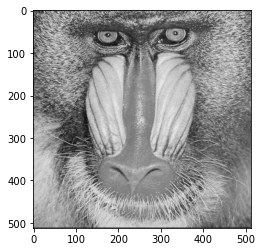

In [35]:
# 1.7 Planos de Bits

# Lendo as imagens

im = iio.imread('https://www.ic.unicamp.br/~helio/imagens_png/baboon.png')

plt.imshow(im, cmap='gray')
plt.show()

In [36]:
new_im_list = []
plano_bit = [1, 2, 4, 8, 16, 32, 64, 128]

for c in plano_bit:
    new_im_list.append(im & c)

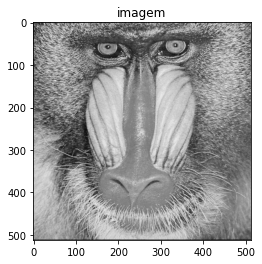

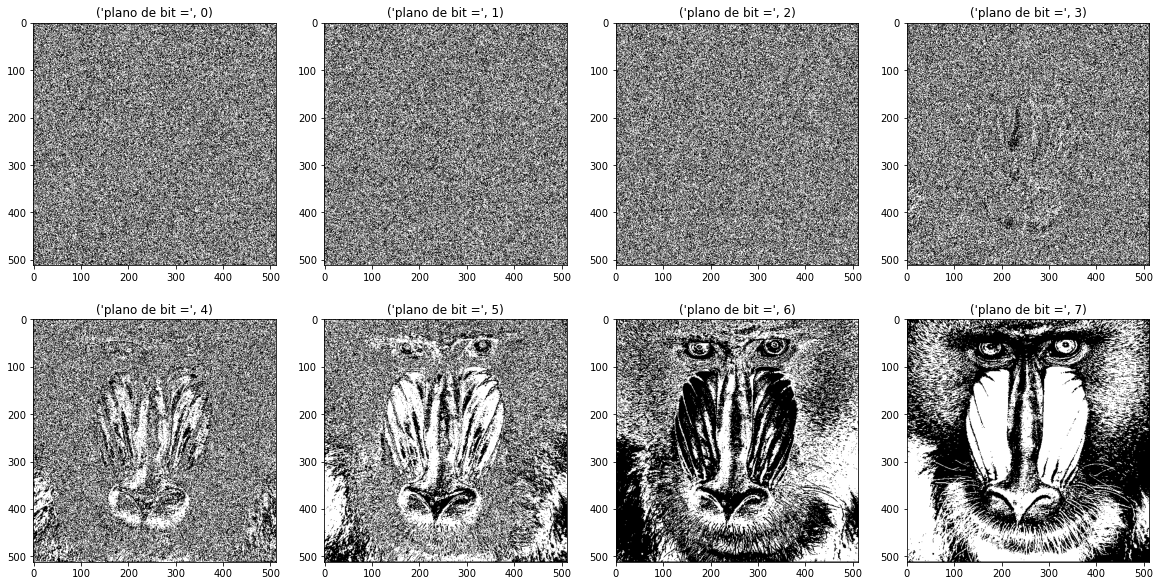

In [37]:
plano_bit_idx = 0

plt.imshow(im, cmap='gray')
plt.title("imagem")
plt.show()

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
for i in range(2):
    for j in range(4):
        axs[i, j].imshow(new_im_list[plano_bit_idx], cmap='gray')
        axs[i, j].set_title(label = ("plano de bit =", plano_bit_idx))
        plano_bit_idx = plano_bit_idx + 1

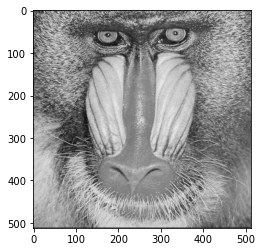

In [46]:
# 1.8 Filtragem de Imagens

# Lendo as imagens

im = iio.imread('https://www.ic.unicamp.br/~helio/imagens_png/baboon.png')

plt.imshow(im, cmap='gray')
plt.show()

In [47]:
# Filtros

h1 = np.array([[0, 0, -1, 0, 0],
              [0, -1, -2, -1, 0],
              [-1, -2, 16, -2, -1],
              [0, -1, -2, -1, 0],
              [0, 0, -1, 0, 0]])

h2 = (1 /256) * np.array([[1, 4, 6, 4, 1],
                         [4, 16, 24, 16, 4],
                         [6, 24, 36, 24, 6],
                         [4, 16, 24, 16, 4],
                         [1, 4, 6, 4, 1]])

h3 = np.array([[-1, 0, 1],
              [-2, 0, 2],
              [-1, 0, 1]])

h4 = np.array([[-1, -2, -1],
              [0, 0, 0],
              [1, 2, 1]])

h5 = np.array([[-1, -1, -1],
              [-1, 8, -1],
              [-1, -1, -1]])

h6 = (1 / 9) * np.array([[1, 1, 1],
                         [1, 1, 1],
                         [1, 1, 1]])

h7 = np.array([[-1, -1, 2],
              [-1, 2, -1],
              [2, -1, -1]])

h8 = np.array([[2, -1, -1],
              [-1, 2, -1],
              [-1, -1, 2]])

h9 = (1 / 9) * np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 1, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 1, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 1, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 1, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 1, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 1, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 1, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 1]])

h10 = (1 / 8) * np.array([[-1, -1, -1, -1, -1],
                         [-1, 2, 2, 2, -1],
                         [-1, 2, 8, 2, -1],
                         [-1, 2, 2, 2, -1],
                         [-1, -1, -1, -1, -1]])

h11 = np.array([[-1, -1, 0],
               [-1, 0, 1],
               [0, 1, 1]])

h12 = (1 / 49) * np.array([[1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1]])

h13 = (1 / 225) * np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                           [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                           [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                           [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                           [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                           [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                           [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                           [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                           [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                           [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                           [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                           [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                           [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                           [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                           [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

h14 = np.array([[1, 2, 1],
               [0, 0, 0],
               [-1, -2, -1]])

h15 = np.array([[1,0, -1],
               [2, 0, -2],
               [1, 0, -1]])

h16 = (1 / 9) * np.array([[-1, -1, -1],
                          [-1, 255, -1],
                          [-1, -1, -1]])

In [48]:
def filtrar(img, filtro):
    pad_size = int(filtro.shape[0] / 2)
    img_pad = np.pad(img, pad_size, mode = "reflect")
    new_img = np.ones((512, 512))
    
    for i in range(512):
        for j in range(512):
            new_img[i, j] = np.sum(img_pad[i:filtro.shape[0]+i, j:filtro.shape[1]+j] * filtro)
            
    new_img = ((new_img - new_img.min()) * 255) / (new_img.max() - new_img.min())
    
    return new_img

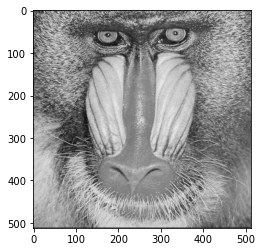

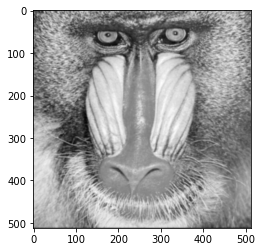

In [95]:
img_filtrada = (filtrar(im, h2)).astype(np.uint8)
plt.imshow(im, cmap='gray')
plt.show()
plt.imshow(img_filtrada, cmap='gray', vmin=0, vmax=255)
plt.show()

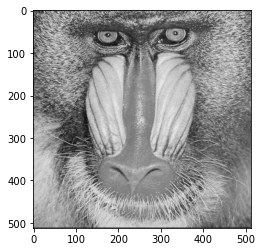

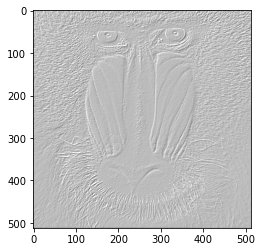

In [49]:
# filtragem combinada h3 e h4
img_filtrada_h3 = filtrar(im, h3)
img_filtrada_h4 = filtrar(im, h4)

img_comb = np.sqrt((img_filtrada_h3) ** 2 + (img_filtrada_h4) ** 2).astype(int)

plt.imshow(im, cmap='gray')
plt.show()
plt.imshow(img_comb, cmap='gray', vmin=0, vmax=255)
plt.show()

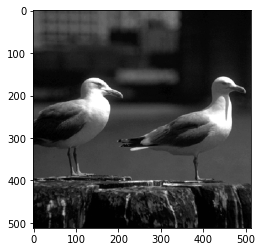

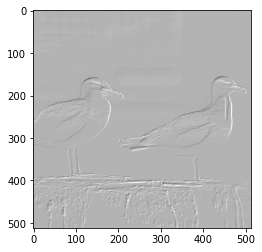

In [43]:
# filtragem combinada h14 e h15
img_filtrada_h14 = filtrar(im, h14)
img_filtrada_h15 = filtrar(im, h15)

img_comb = np.sqrt((img_filtrada_h14) ** 2 + (img_filtrada_h15) ** 2).astype(int)

plt.imshow(im, cmap='gray')
plt.show()
plt.imshow(img_comb, cmap='gray', vmin=0, vmax=255)
plt.show()

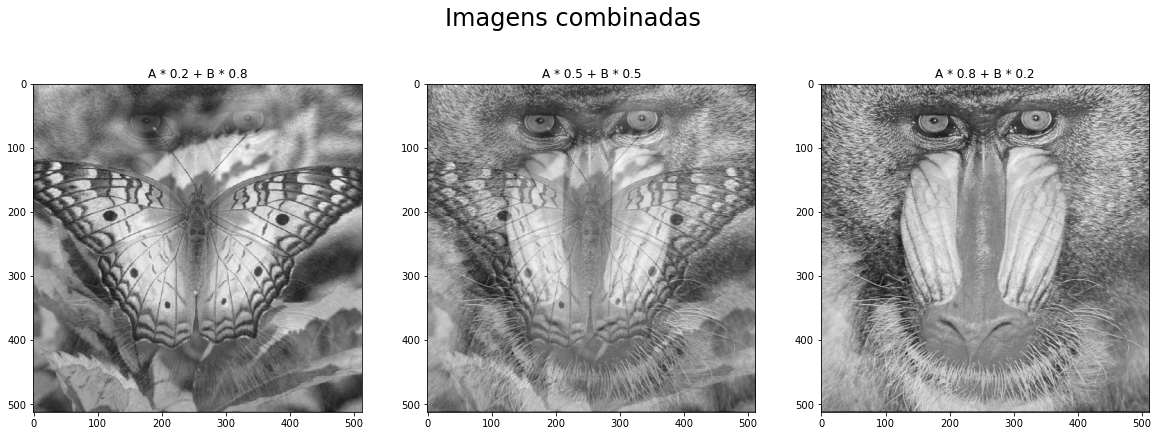

In [150]:
# ------------------------------------------
# Carregamento de bibliotecas
import imageio as iio
import matplotlib.pyplot as plt
import numpy as np
import random
# ------------------------------------------


# ------------------------------------------
# Questão 1.2 - Combinação de imagens
# Combinar duas imagens monocromaticas de mesmo tamanho por meio da média
# ponderada de seus níveis de cinza.
# ------------------------------------------

# ler duas imagens
im_A = iio.imread('https://www.ic.unicamp.br/~helio/imagens_png/baboon.png')
im_B = iio.imread('https://www.ic.unicamp.br/~helio/imagens_png/butterfly.png')

# calcular as imagens combinadas e fazer o plot dsas mesmas
pesos = np.array([0.2, 0.5, 0.8])
fig, axs = plt.subplots(1, 3, figsize=(20, 7))
fig.suptitle('Imagens combinadas', fontsize=24)

for c in range(3):
    im_comb = im_A * pesos[c] + im_B * pesos[-(c + 1)]
    axs[c].imshow(im_comb, cmap='gray')
    label = 'A * ' + str(pesos[c]) + ' + B * ' + str(pesos[-(c + 1)])
    axs[c].set_title(label)
plt.show()

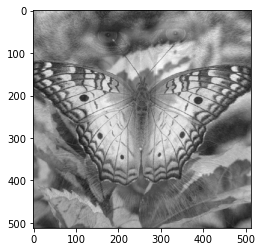

In [130]:
im_comb = im_A * pesos[0] + im_B * pesos[-1]
plt.imshow(im_comb, cmap = "gray")
plt.show()

In [135]:
pesos[2]

0.8

In [136]:
pesos[-3]

0.2

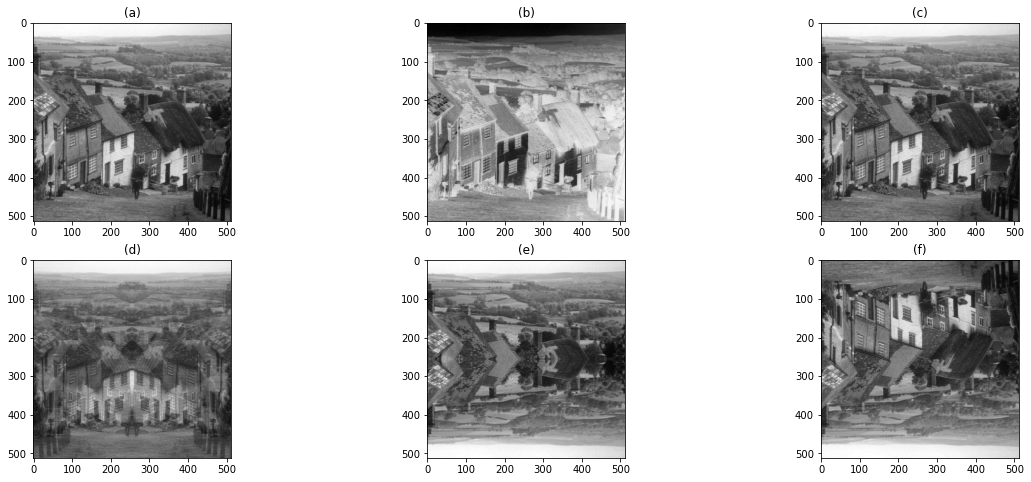

In [158]:
# ------------------------------------------
# Carregamento de bibliotecas
import imageio as iio
import matplotlib.pyplot as plt
import numpy as np
import random
# ------------------------------------------


# ------------------------------------------
# Questão 1.3 - Transformação de Intensidade
# ------------------------------------------

# ------------------------------------------
# (a) Dada uma imagem monocromática
# ------------------------------------------
im = iio.imread('https://www.ic.unicamp.br/~helio/imagens_png/city.png')

# ------------------------------------------
# (b) obter o negativo da imagem
# ------------------------------------------
im_negativa = 255 - im

# ------------------------------------------
# (c) converter o intervalo de intensidades para [100, 200]
# ------------------------------------------
lim_sup = 200
lim_inf = 100
im_contraste = ((im * ((lim_sup - lim_inf) / 255)) + lim_inf).astype(np.uint8)

# ------------------------------------------
# (d) inverter os valores dos pixels das linhas pares da imagem
# ------------------------------------------
im_linhas_inv = im.copy()

for r in range(0, 512, 2):
    im_linhas_inv[r, :] = im[r, ::-1]

# ------------------------------------------
# (e) espelhar as linhas da metade superior da imagem
# na parte inferior da imagem
# ------------------------------------------
im_espelhada = im.copy()

im_espelhada[256:, :] = im_espelhada[0:256, :][::-1, ...]

# ------------------------------------------
# (f) aplicar um espelhamento vertical na imagem
# levando-se em conta todas as linhas da imagem
# ------------------------------------------
im_flip_vertical = im.copy()

im_flip_vertical = im_flip_vertical[::-1, ...]


# ------------------------------------------
# plot das imagens
# ------------------------------------------
imagens = np.array([["(a)", "(b)", "(c)", "(d)", "(e)", "(f)"],
                    [im, im_negativa, im_contraste, im_linhas_inv, im_espelhada, im_flip_vertical]],
                  dtype = "object")
fig, axs = plt.subplots(2, 3, figsize = (20, 8))

im_idx = 0
for i in [0, 1]:
    for j in [0, 1, 2,]:
        axs[i, j].imshow(imagens[1, im_idx], cmap = "gray")
        axs[i, j].set_title(imagens[0, im_idx])
        im_idx = im_idx + 1




In [154]:
imagens.shape

(2, 6)

In [167]:
h3h4 = np.sqrt(h3 ** 2 + h4 ** 2).astype(int)

In [168]:
h3h4

array([[1, 2, 1],
       [2, 0, 2],
       [1, 2, 1]])